In [15]:
import pandas as pd
import numpy as np

In [16]:
data = pd.read_excel("C:/Users/sohra/Desktop/Dr_Baradaran/Bardaskan_Sabzevar/3_SPF/spf.data.xlsx", header=2)
data.head()

,Seg,Y,Clus.len,Seg.len,X1,X2,X3,X4,Alt1
0,1,3,582.269027,714.269027,0.714269,7327,2.800065,2,430
1,2,3,361.029199,493.029199,0.493029,7327,4.056555,2,430
2,3,4,697.282659,829.282659,0.829283,7327,1.205861,1,430
3,4,9,1401.893619,1533.893619,1.533894,7327,1.955807,3,430
4,5,5,1032.272347,1164.272347,1.164272,7327,0.000000,0,430


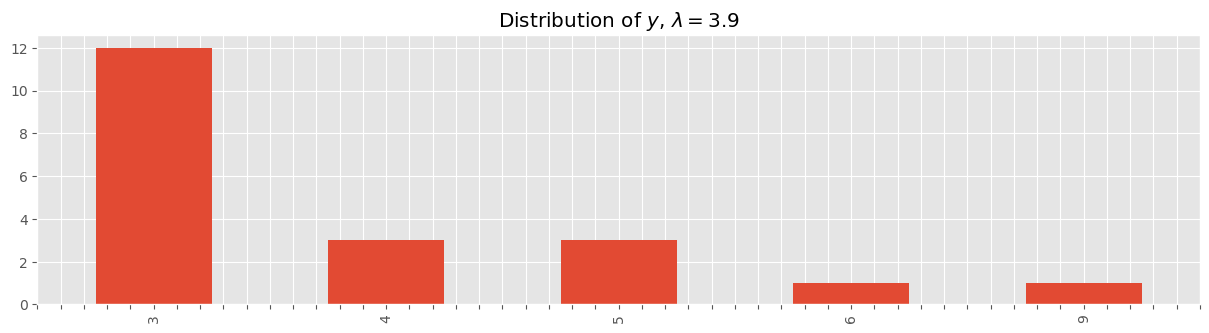

In [17]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

m = data['Y'].mean()
s = data['Y'].value_counts().sort_index()
ax = s.plot(kind='bar', figsize=(15, 3.5), title=rf'Distribution of $y$, $\lambda={m:.1f}$')
_ = ax.xaxis.set_major_locator(plt.MaxNLocator(50))

In [18]:
import statsmodels.api as sm 
import matplotlib.pyplot as plt
from statsmodels.tools.tools import add_constant
from statsmodels.discrete.discrete_model import NegativeBinomial

In [19]:
X = data[['X1', 'X2', 'X3']]
Y = data['Y']

************************************************************
BIC:  -50.582943406117145
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -48.902
Date:                Tue, 20 Dec 2022   Deviance:                      0.34451
Time:                        10:44:58   Pearson chi2:                    0.365
No. Iterations:                     2   Pseudo R-squ. (CS):            0.06637
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


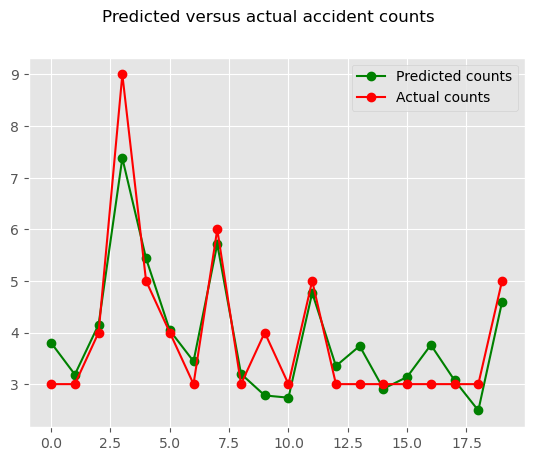

In [26]:
model = sm.GLM(Y, X, family=sm.families.NegativeBinomial())
model_fitted = model.fit(method='newton', maxiter=1000)
print("************************************************************")
print("BIC: ", model_fitted.bic)
print(model_fitted.summary())
    
# Predicted vs. Actual plot
nb_predictions = model_fitted.predict(X)
actual_counts = Y
fig = plt.figure()
fig.suptitle('Predicted versus actual accident counts')
predicted, = plt.plot(X.index, nb_predictions, 'go-', label='Predicted counts')
actual, = plt.plot(X.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

************************************************************
alpha:  0.01 BIC:  -49.3852399915483
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -33.079
Date:                Tue, 20 Dec 2022   Deviance:                       1.5422
Time:                        10:49:25   Pearson chi2:                     1.61
No. Iterations:                     2   Pseudo R-squ. (CS):             0.3104
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


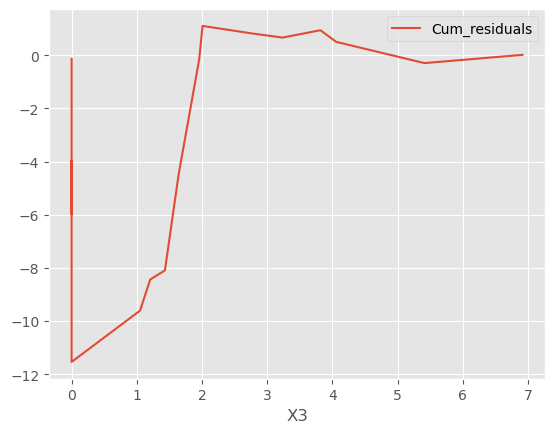

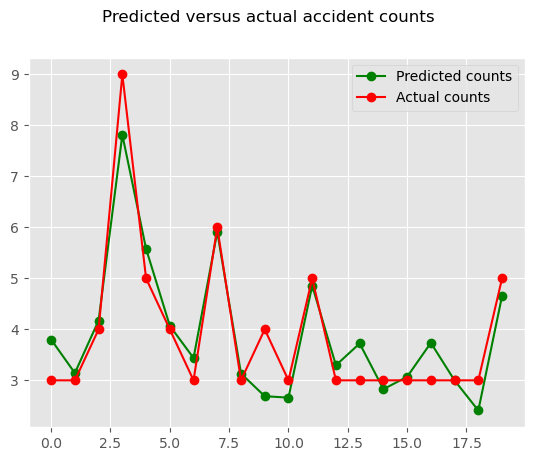

************************************************************
alpha:  0.27263157894736845 BIC:  -50.12994812543033
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -39.638
Date:                Tue, 20 Dec 2022   Deviance:                      0.79750
Time:                        10:49:26   Pearson chi2:                    0.841
No. Iterations:                     2   Pseudo R-squ. (CS):             0.1567
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


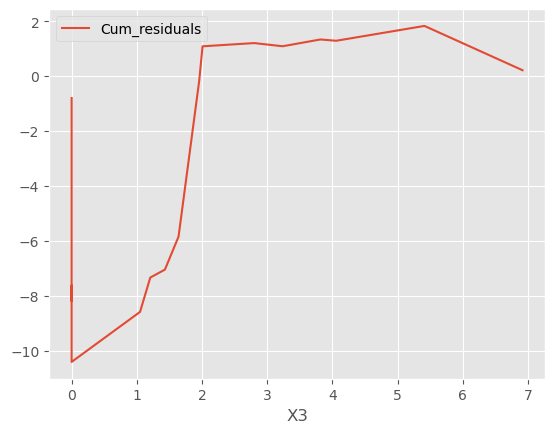

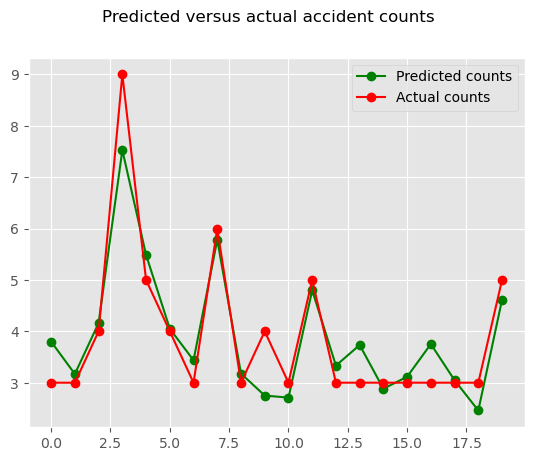

************************************************************
alpha:  0.5352631578947369 BIC:  -50.38704482266487
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -43.794
Date:                Tue, 20 Dec 2022   Deviance:                      0.54040
Time:                        10:49:27   Pearson chi2:                    0.572
No. Iterations:                     2   Pseudo R-squ. (CS):             0.1050
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


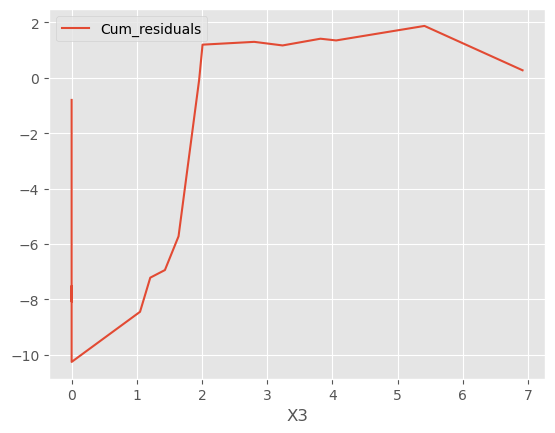

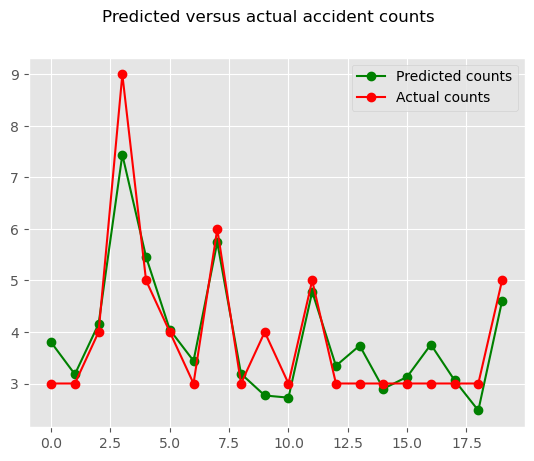

************************************************************
alpha:  0.7978947368421053 BIC:  -50.518510169721985
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -46.915
Date:                Tue, 20 Dec 2022   Deviance:                      0.40894
Time:                        10:49:27   Pearson chi2:                    0.433
No. Iterations:                     2   Pseudo R-squ. (CS):            0.07902
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


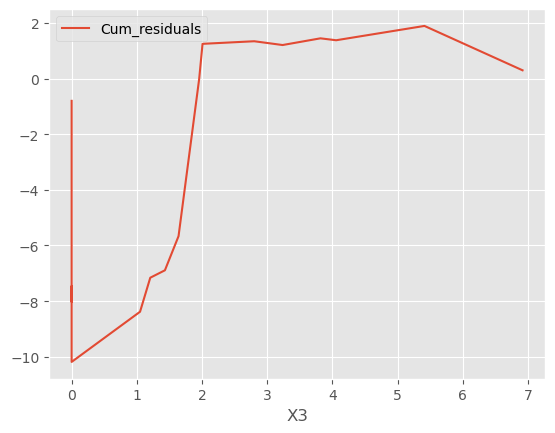

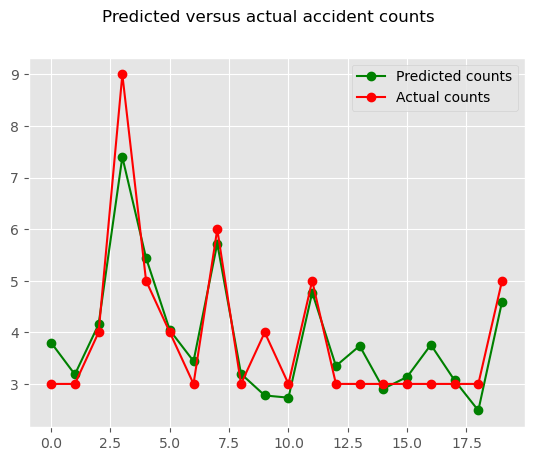

************************************************************
alpha:  1.0605263157894738 BIC:  -50.59846238344153
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -49.446
Date:                Tue, 20 Dec 2022   Deviance:                      0.32899
Time:                        10:49:28   Pearson chi2:                    0.349
No. Iterations:                     2   Pseudo R-squ. (CS):            0.06334
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


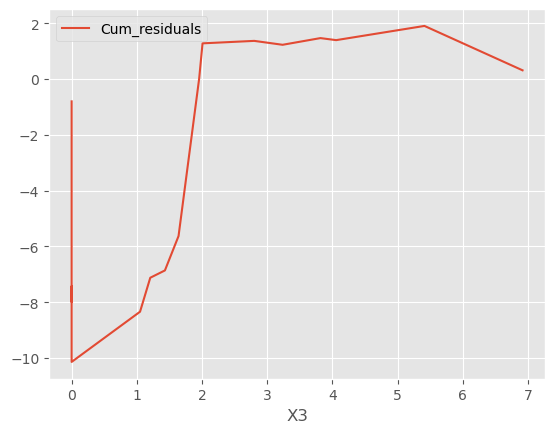

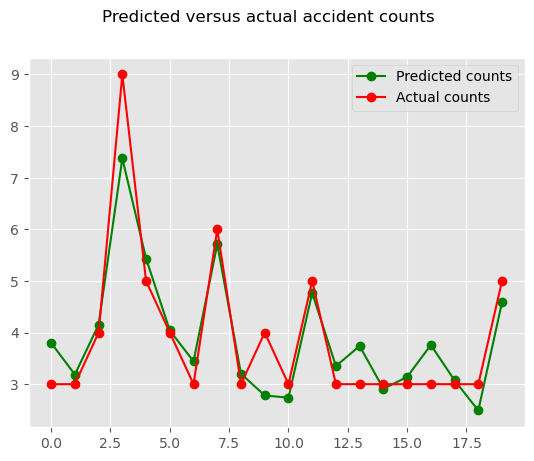

************************************************************
alpha:  1.3231578947368423 BIC:  -50.65224247363274
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -51.590
Date:                Tue, 20 Dec 2022   Deviance:                      0.27521
Time:                        10:49:29   Pearson chi2:                    0.292
No. Iterations:                     2   Pseudo R-squ. (CS):            0.05285
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


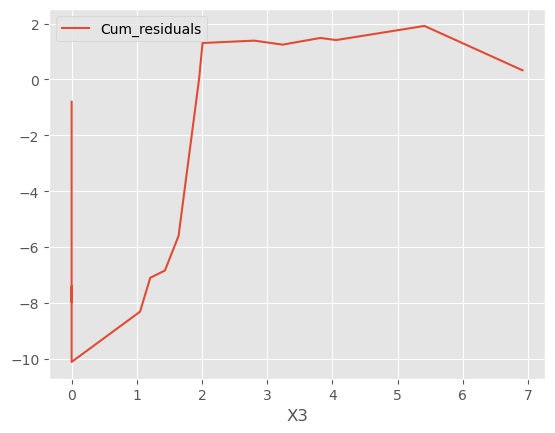

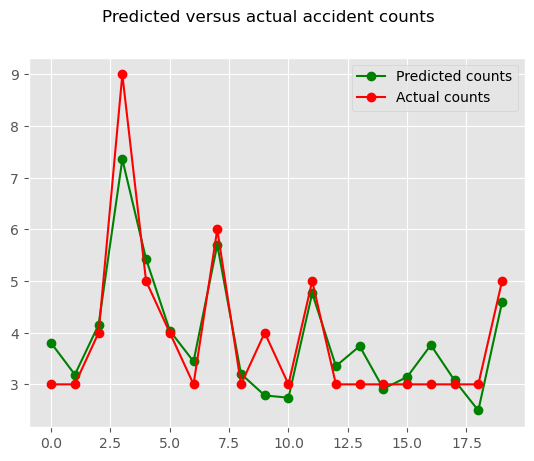

************************************************************
alpha:  1.5857894736842106 BIC:  -50.690901100466775
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -53.460
Date:                Tue, 20 Dec 2022   Deviance:                      0.23655
Time:                        10:49:29   Pearson chi2:                    0.251
No. Iterations:                     3   Pseudo R-squ. (CS):            0.04534
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


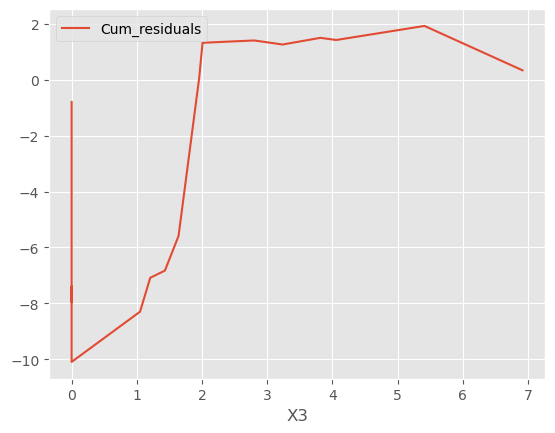

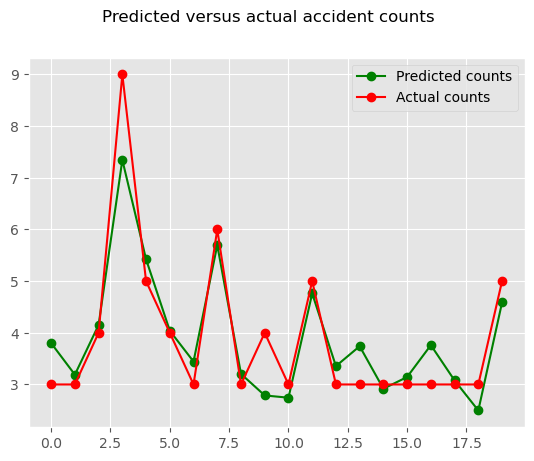

************************************************************
alpha:  1.848421052631579 BIC:  -50.720032421293034
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -55.123
Date:                Tue, 20 Dec 2022   Deviance:                      0.20742
Time:                        10:49:30   Pearson chi2:                    0.220
No. Iterations:                     3   Pseudo R-squ. (CS):            0.03971
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


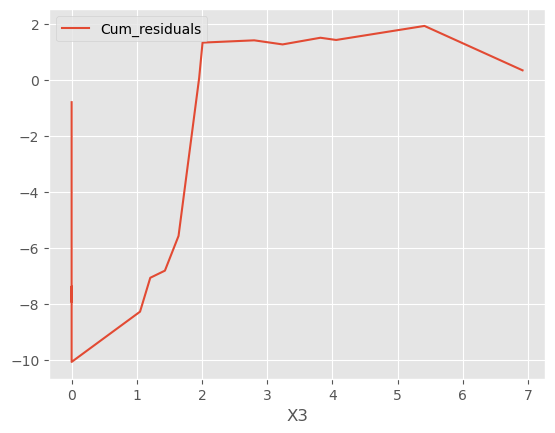

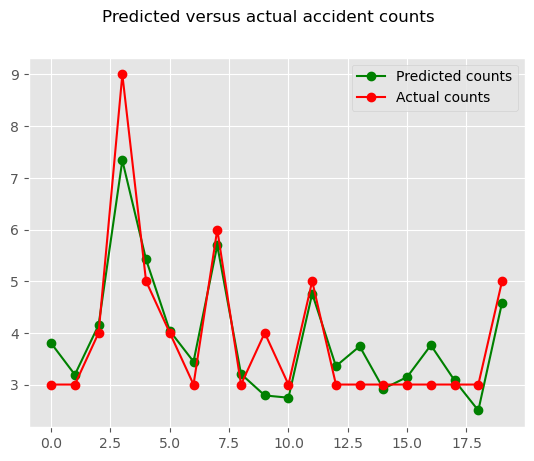

************************************************************
alpha:  2.1110526315789473 BIC:  -50.74277315809229
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -56.624
Date:                Tue, 20 Dec 2022   Deviance:                      0.18468
Time:                        10:49:31   Pearson chi2:                    0.196
No. Iterations:                     3   Pseudo R-squ. (CS):            0.03531
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


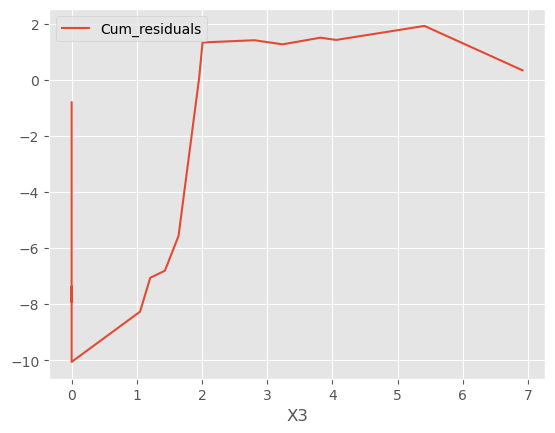

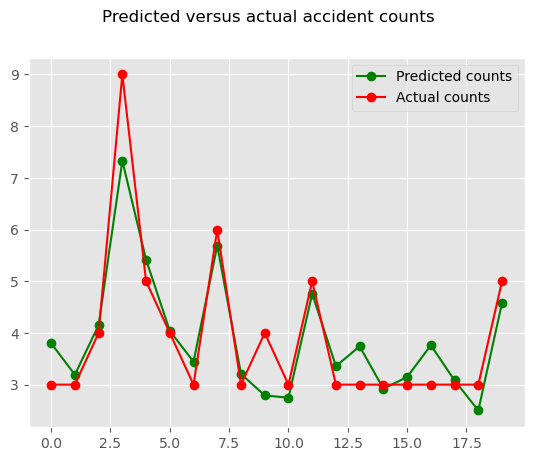

************************************************************
alpha:  2.373684210526316 BIC:  -50.761018866195684
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -57.996
Date:                Tue, 20 Dec 2022   Deviance:                      0.16643
Time:                        10:49:31   Pearson chi2:                    0.177
No. Iterations:                     3   Pseudo R-squ. (CS):            0.03180
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


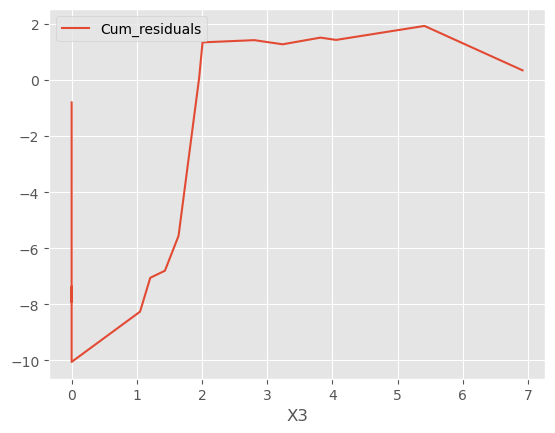

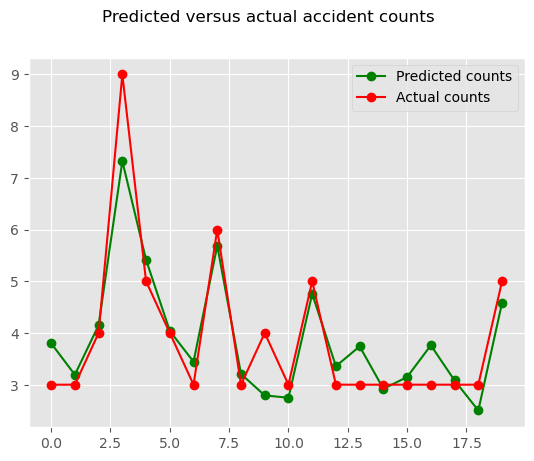

************************************************************
alpha:  2.6363157894736844 BIC:  -50.775982714301364
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -59.259
Date:                Tue, 20 Dec 2022   Deviance:                      0.15147
Time:                        10:49:32   Pearson chi2:                    0.161
No. Iterations:                     3   Pseudo R-squ. (CS):            0.02892
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


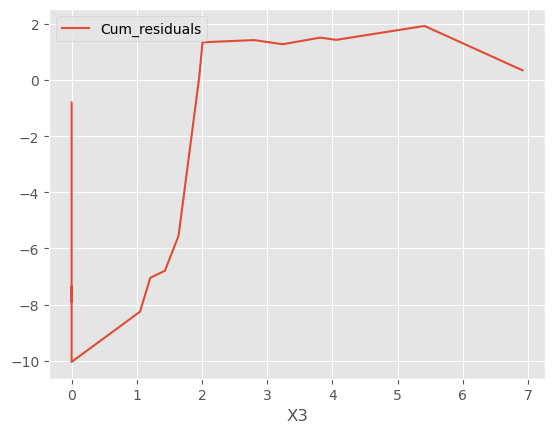

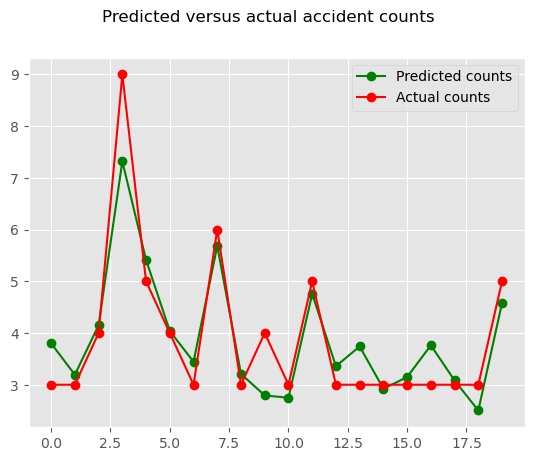

************************************************************
alpha:  2.8989473684210525 BIC:  -50.78847725879358
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -60.432
Date:                Tue, 20 Dec 2022   Deviance:                      0.13897
Time:                        10:49:33   Pearson chi2:                    0.148
No. Iterations:                     3   Pseudo R-squ. (CS):            0.02652
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


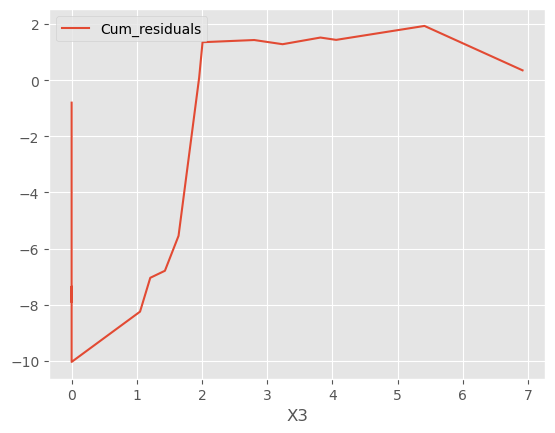

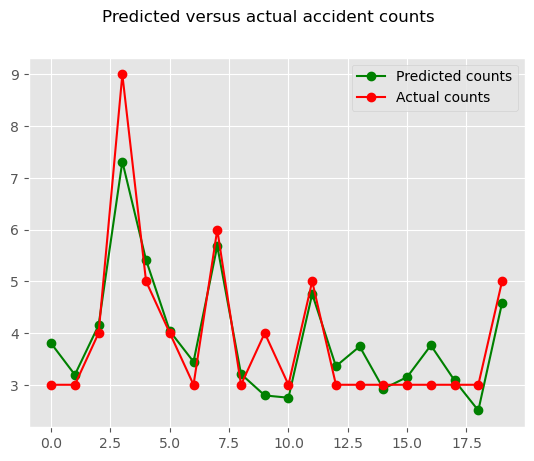

************************************************************
alpha:  3.161578947368421 BIC:  -50.79906722304201
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -61.528
Date:                Tue, 20 Dec 2022   Deviance:                      0.12838
Time:                        10:49:34   Pearson chi2:                    0.137
No. Iterations:                     3   Pseudo R-squ. (CS):            0.02448
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


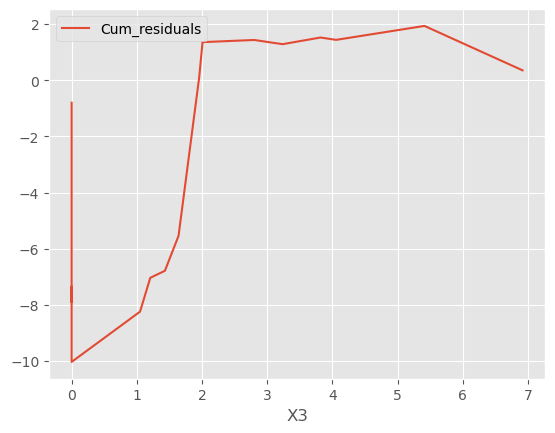

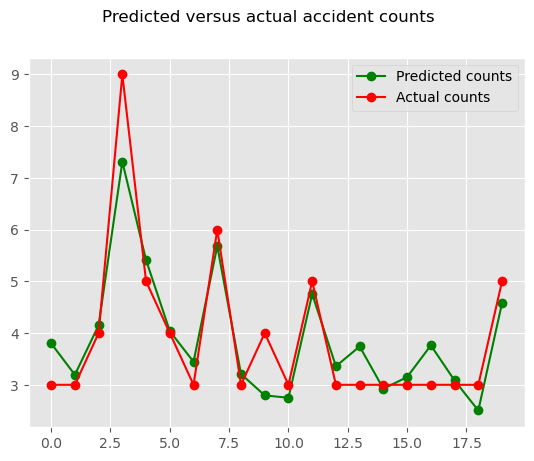

************************************************************
alpha:  3.4242105263157896 BIC:  -50.80815730384921
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -62.556
Date:                Tue, 20 Dec 2022   Deviance:                      0.11929
Time:                        10:49:34   Pearson chi2:                    0.127
No. Iterations:                     3   Pseudo R-squ. (CS):            0.02274
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


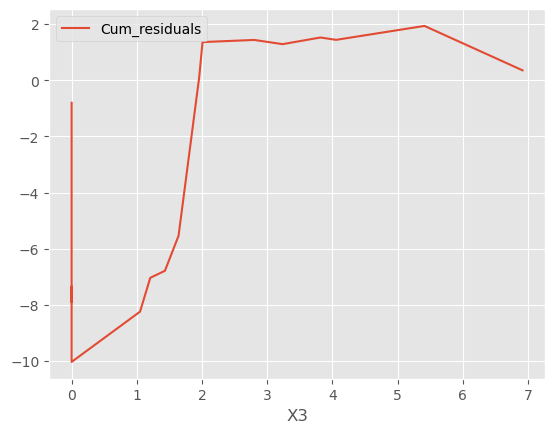

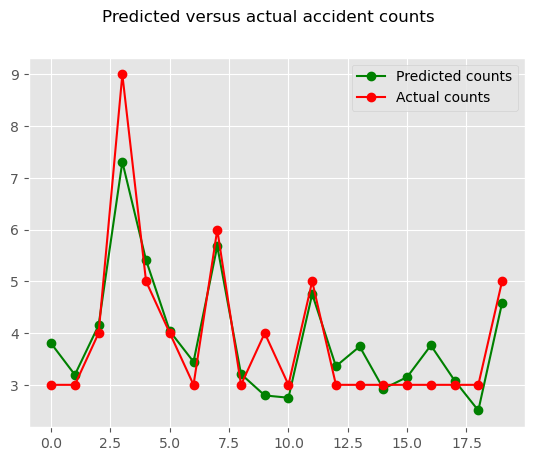

************************************************************
alpha:  3.6868421052631577 BIC:  -50.816045112008894
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -63.525
Date:                Tue, 20 Dec 2022   Deviance:                      0.11140
Time:                        10:49:35   Pearson chi2:                    0.119
No. Iterations:                     3   Pseudo R-squ. (CS):            0.02123
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


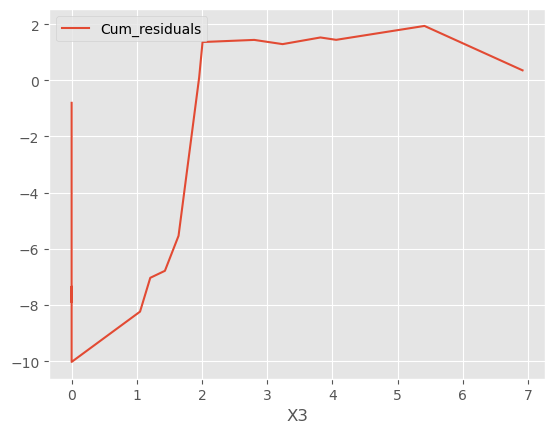

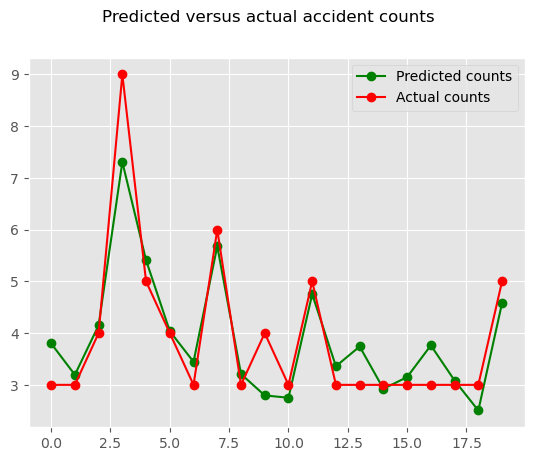

************************************************************
alpha:  3.9494736842105262 BIC:  -50.82295439807186
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -64.443
Date:                Tue, 20 Dec 2022   Deviance:                      0.10449
Time:                        10:49:36   Pearson chi2:                    0.111
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01991
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


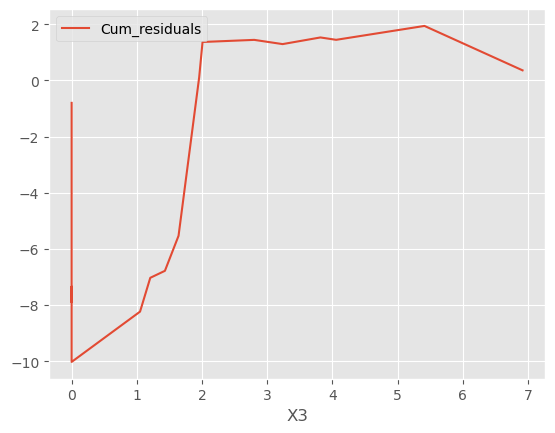

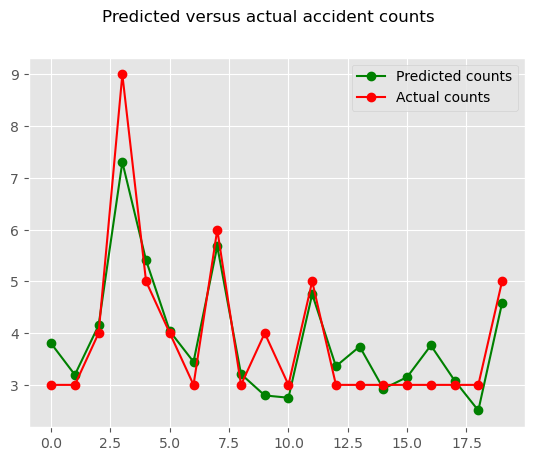

************************************************************
alpha:  4.212105263157895 BIC:  -50.82905662892312
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -65.314
Date:                Tue, 20 Dec 2022   Deviance:                     0.098392
Time:                        10:49:36   Pearson chi2:                    0.105
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01874
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


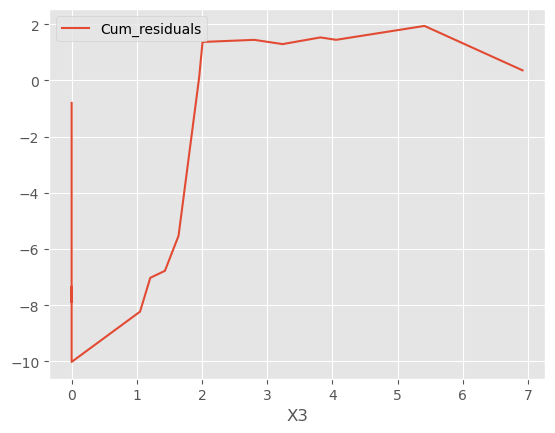

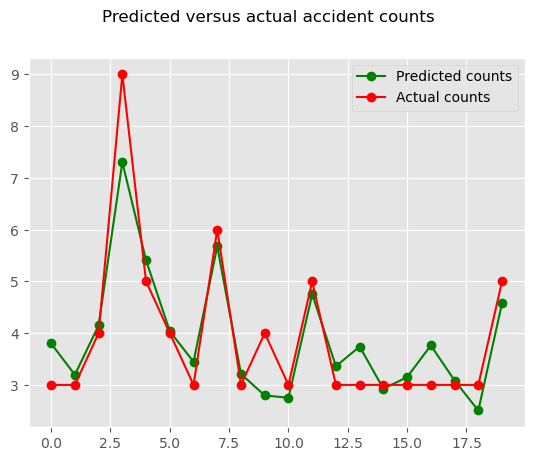

************************************************************
alpha:  4.474736842105263 BIC:  -50.83448541751977
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -66.143
Date:                Tue, 20 Dec 2022   Deviance:                     0.092963
Time:                        10:49:37   Pearson chi2:                   0.0989
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01770
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


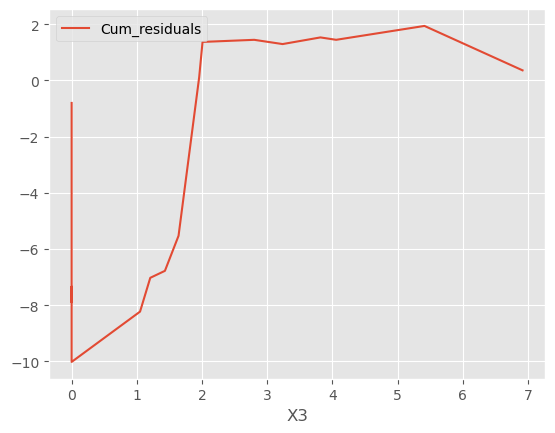

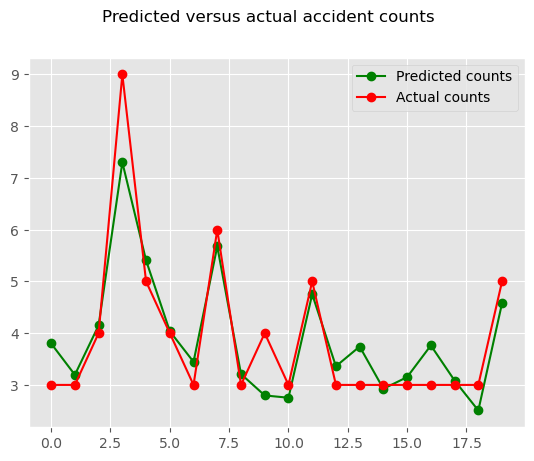

************************************************************
alpha:  4.737368421052632 BIC:  -50.8393464233142
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -66.935
Date:                Tue, 20 Dec 2022   Deviance:                     0.088102
Time:                        10:49:38   Pearson chi2:                   0.0938
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01677
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


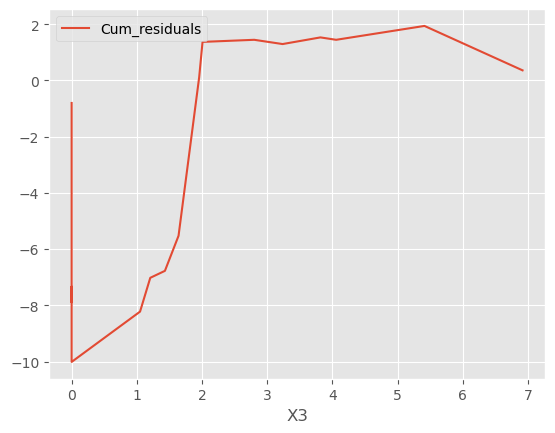

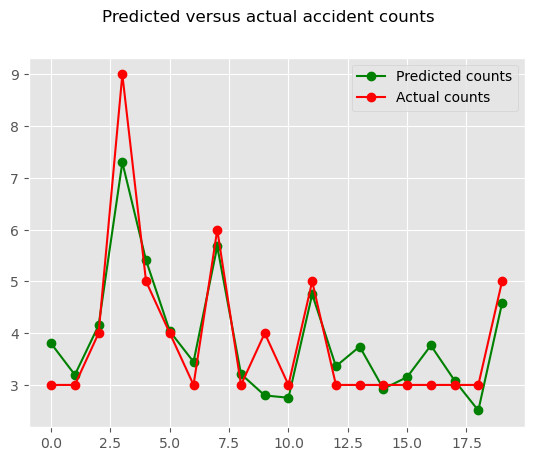

************************************************************
alpha:  5.0 BIC:  -50.843724299664025
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -67.693
Date:                Tue, 20 Dec 2022   Deviance:                     0.083724
Time:                        10:49:39   Pearson chi2:                   0.0891
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01593
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


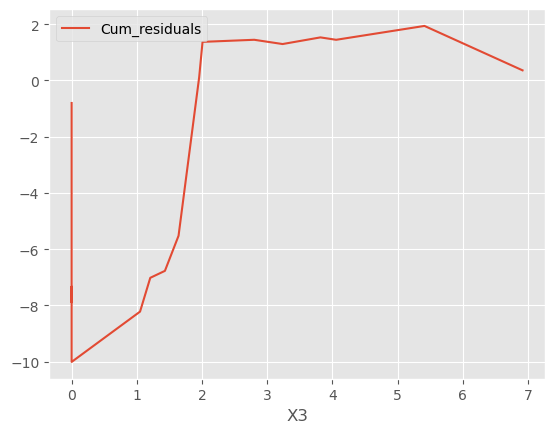

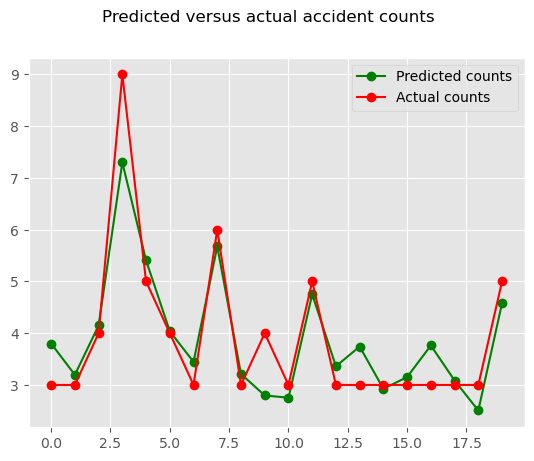

In [38]:
# Testing negative binomial againts different alpha values to find the best value

for alpha in np.linspace(0.01, 5, 20):
    model = sm.GLM(Y, X, family=sm.families.NegativeBinomial(alpha=alpha))
    model_fitted = model.fit(method='newton', maxiter=1000)
    print("************************************************************")
    print("alpha: ",alpha, "BIC: ", model_fitted.bic)
    print(model_fitted.summary())
    
    # CURE plot
    data["fitted"] = model_fitted.predict()
    data["residuals"] = data["Y"] - data["fitted"]
    data.sort_values(by=['X3'], ascending=True, inplace=True)
    data["Cum_residuals"] = data["residuals"].cumsum()
    data.plot(x= 'X3', y= 'Cum_residuals')
    
    # Predicted vs. Actual plot
    nb_predictions = model_fitted.predict(X)
    actual_counts = Y
    fig = plt.figure()
    fig.suptitle('Predicted versus actual accident counts')
    predicted, = plt.plot(X.index, nb_predictions, 'go-', label='Predicted counts')
    actual, = plt.plot(X.index, actual_counts, 'ro-', label='Actual counts')
    plt.legend(handles=[predicted, actual])
    plt.show()

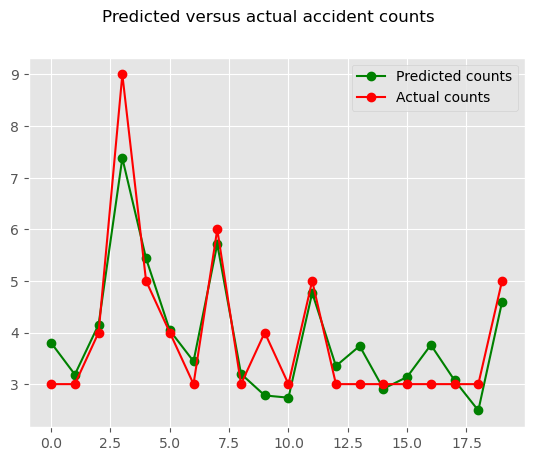

In [21]:
nb_predictions = model_fitted.predict()
actual_counts = Y
fig = plt.figure()
fig.suptitle('Predicted versus actual accident counts')
predicted, = plt.plot(X.index, nb_predictions, 'go-', label='Predicted counts')
actual, = plt.plot(X.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

In [34]:
# CURE plot
data["fitted"] = model_fitted.predict()
data["residuals"] = data["Y"] - data["fitted"]

In [35]:
data.sort_values(by=['X1'], ascending=True, inplace=True)

In [36]:
data["Cum_residuals"] = data["residuals"].cumsum()
data.head()

,Seg,Y,Clus.len,Seg.len,X1,X2,X3,X4,Alt1,fitted,residuals,Cum_residuals
18,19,3,52.815396,184.815396,0.184815,7327,5.410805,1,430,2.489364,0.510636,0.510636
10,11,3,177.098792,309.098792,0.309099,7327,3.235212,1,430,3.139359,-0.139359,0.371277
9,10,4,207.518076,339.518076,0.339518,7327,0.000000,0,430,4.040552,-0.040552,0.330725
14,15,3,263.736824,395.736824,0.395737,7327,0.000000,0,430,3.185858,-0.185858,0.144867
17,18,3,330.218801,462.218801,0.462219,7327,0.000000,0,430,4.153876,-1.153876,-1.009010


<AxesSubplot: xlabel='X1'>

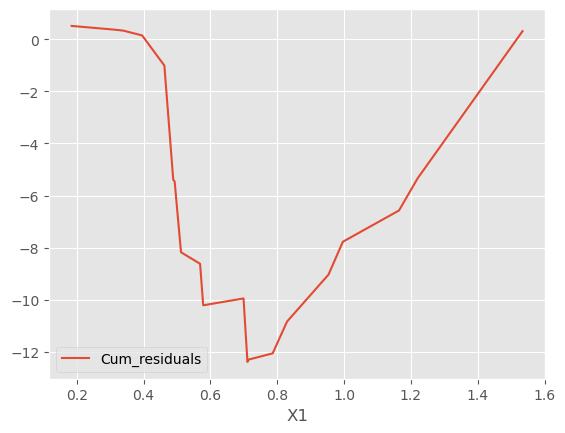

In [37]:
# A good CURE plot should meander around the horizontal axis in a manner consistent with a symmetric random walk

data.plot(x= 'X1', y= 'Cum_residuals')